## Customer Segmentation through Clustering

## Project Overview

This project focuses on segmenting mall customers by analyzing their income and spending patterns, utilizing unsupervised learning techniques, specifically clustering.

##🎯 Key Objectives

- Data Preparation: Preprocess and scale the raw customer data.

- Initial Visualization: Create visualizations to explore the customer dataset.

- K-Means Application: Implement K-Means clustering and identify the most effective number of clusters.

- Cluster Representation: Generate visualizations to display the formed customer clusters.

## Required Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
import pandas as pd
from google.colab import files
import io

# This will open a file upload dialog in your browser
uploaded = files.upload()

# Get the filename of the uploaded file
# This assumes you are uploading only one file
filename = next(iter(uploaded))

# Read the uploaded CSV file into a DataFrame
# uploaded[filename] contains the file's content in bytes
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display the first 10 rows of the DataFrame
print(df.head(10))

Saving Mall_Customers (1).csv to Mall_Customers (1).csv
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


from matplotlib import pyplot as plt
_df_0['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='CustomerID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

##✅ Checking for Missing Values
Before we move forward with clustering, it's essential to verify that the dataset is clean and doesn't contain any missing values. In this step, we'll inspect each column for null entries.

If all columns return zero missing values, it confirms the dataset is ready for preprocessing and model training.

In [8]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## 🔎 Exploratory Data Analysis

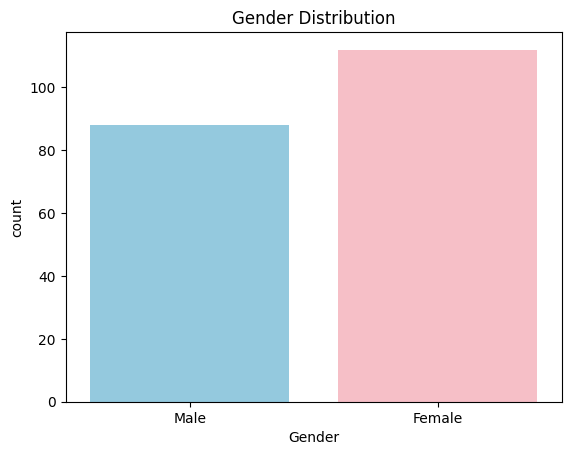

In [18]:
sns.countplot(data=df, x='Gender', palette={'Male': 'skyblue', 'Female': 'lightpink'})
plt.title("Gender Distribution")
plt.show()


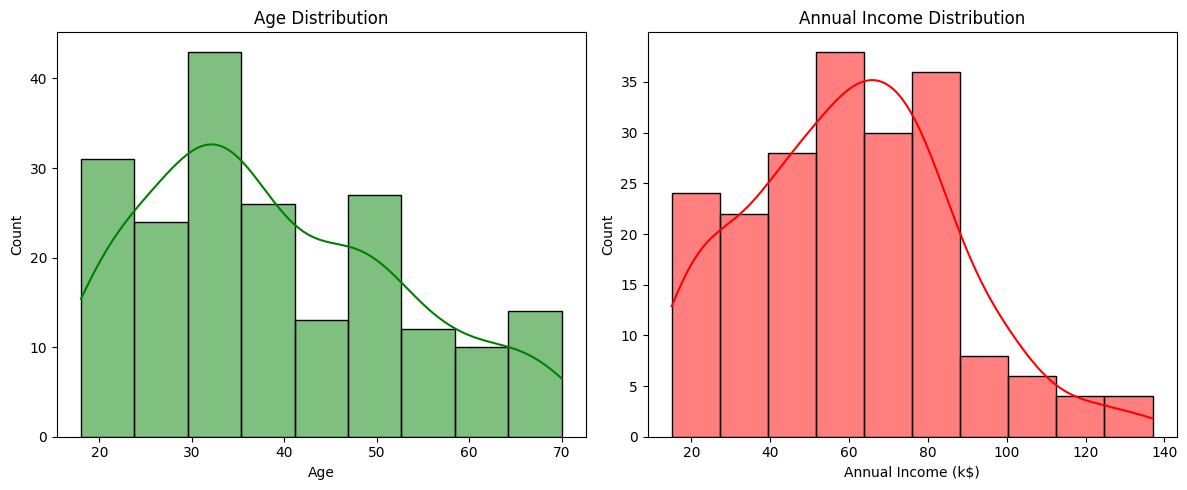

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Change colors here using the 'color' parameter
sns.histplot(df['Age'], kde=True, ax=axs[0], color='green')
axs[0].set_title("Age Distribution")

sns.histplot(df['Annual Income (k$)'], kde=True, ax=axs[1], color='red')
axs[1].set_title("Annual Income Distribution")

plt.tight_layout()
plt.show()


## Feature Scaling
Before applying clustering algorithms such as K-Means, it is essential to perform feature scaling—particularly when the dataset contains variables with different units or value ranges.

## In this dataset:

- Annual Income (k$) ranges from 15 to 137

- Spending Score (1–100) ranges from 1 to 100

- Without proper scaling:

- Features with larger numerical ranges (e.g., income) can disproportionately influence the clustering algorithm’s distance calculations.

## This imbalance can lead to distorted and suboptimal clustering outcomes.

- To address this, we apply Min-Max Scaling, which transforms the features to a normalized range of [0, 1]. This ensures that each feature contributes equally during the clustering process.

## We will now use the MinMaxScaler from sklearn.preprocessing to scale the selected features.

In [19]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['Annual Income (k$)','Spending Score (1-100)']] = scaler.fit_transform(df_scaled[['Annual Income (k$)','Spending Score (1-100)']])
df_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


from matplotlib import pyplot as plt
_df_11['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='CustomerID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Spending Score (1-100)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Spending Score (1-100)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CustomerID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CustomerID'}, axis=1)
              .sort_values('CustomerID', ascending=True))
  xs = counted['CustomerID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Annual Income (k$)']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('Annual Income (k$)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Annual Income (k$)')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
_df_23['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='CustomerID', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='Age', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='Annual Income (k$)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='Spending Score (1-100)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Visualizing Income and Spending Score

To gain insights into the distribution of customers, we visualize their **Annual Income** versus **Spending Score**.

This scatter plot helps us understand how customers are grouped based on their spending behavior relative to their income.

- We might notice natural clusters or groupings that suggest different customer segments.

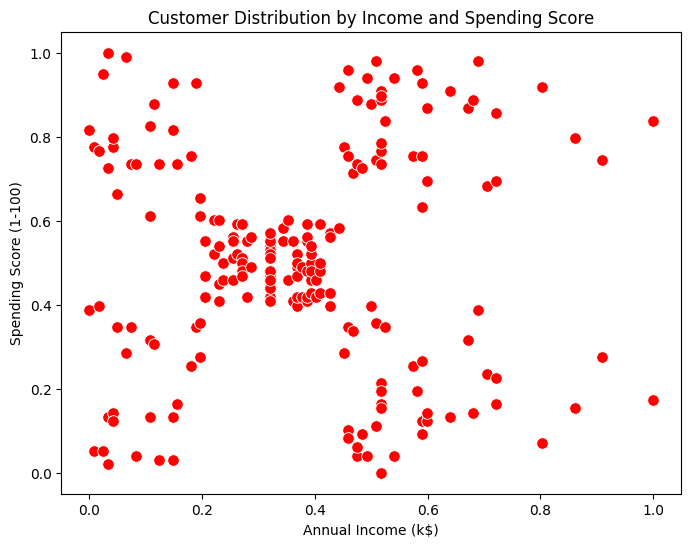

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Annual Income (k$)' , y= 'Spending Score (1-100)' , data = df_scaled , s=70 , color='red')
plt.title('Customer Distribution by Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

##📈 Determining the Optimal Number of Clusters Using the Elbow Method
To identify the most suitable number of clusters (K) for K-Means clustering, we utilize the Elbow Method, a popular and intuitive evaluation technique.

## This process involves the following steps:

1. Run K-Means for a range of cluster values (typically from K = 1 to 10).

2. Compute the Within-Cluster Sum of Squares (WCSS) for each value of K.

3. Plot WCSS against the number of clusters (K).

4. Locate the "elbow point"—the point at which the rate of decrease in WCSS sharply slows down.

The elbow point reflects an optimal balance between model complexity and clustering performance. Beyond this point, increasing K yields diminishing returns, as additional clusters no longer significantly reduce the WCSS.

This optimal K value helps us avoid both underfitting (too few clusters) and overfitting (too many clusters).

In [26]:
k_rng = range(1,10)
wcss = []
for k in k_rng:
    km = KMeans(n_clusters = k , random_state=42)
    km.fit(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(km.inertia_)

wcss

[23.040720326039906,
 14.0859825590406,
 9.05979275116692,
 6.12185661885036,
 3.585166913062471,
 3.2233070168998745,
 2.9095421767924172,
 2.4699952223283113,
 2.2874019043217952]

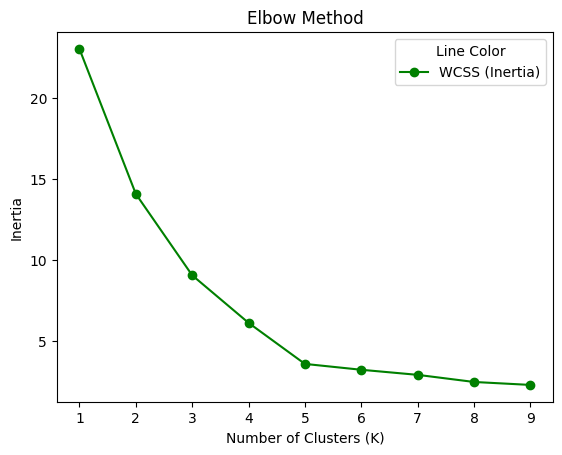

In [31]:
plt.plot(k_rng, wcss, marker='o', color='green', label='WCSS (Inertia)')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.legend(title="Line Color")
plt.grid(False)
plt.show()


## Optimal K Value: K = 5
After applying the Elbow Method, we observe that the curve begins to flatten significantly at K = 5, indicating the optimal number of clusters.

Opting for K = 5 strikes an effective balance between computational efficiency and clustering precision. This choice results in a noteworthy decrease in the Within-Cluster Sum of Squares (WCSS), suggesting that adding more clusters beyond this point provides diminishing returns in terms of variance reduction.

Thus, we proceed with K = 5 for the K-Means clustering task.

## 🧩 K-Means Clustering

In [32]:
km = KMeans(n_clusters = 5 , random_state=42)
y_predicted = km.fit_predict(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled['cluster'] = y_predicted

In [33]:
df_scaled.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,2
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,2
4,5,Female,31,0.016393,0.397959,4
5,6,Female,22,0.016393,0.765306,2
6,7,Female,35,0.024590,0.051020,4
7,8,Female,23,0.024590,0.948980,2
8,9,Male,64,0.032787,0.020408,4
9,10,Female,30,0.032787,0.724490,2


from matplotlib import pyplot as plt
_df_31['CustomerID'].plot(kind='hist', bins=20, title='CustomerID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_35.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='CustomerID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='Spending Score (1-100)', y='cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Spending Score (1-100)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Spending Score (1-100)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['cluster']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('cluster')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CustomerID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CustomerID'}, axis=1)
              .sort_values('CustomerID', ascending=True))
  xs = counted['CustomerID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_44['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_48['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_48, x='CustomerID', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_49['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_49, x='Age', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_50['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_50, x='Annual Income (k$)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_51['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_51, x='Spending Score (1-100)', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Cluster Visualization

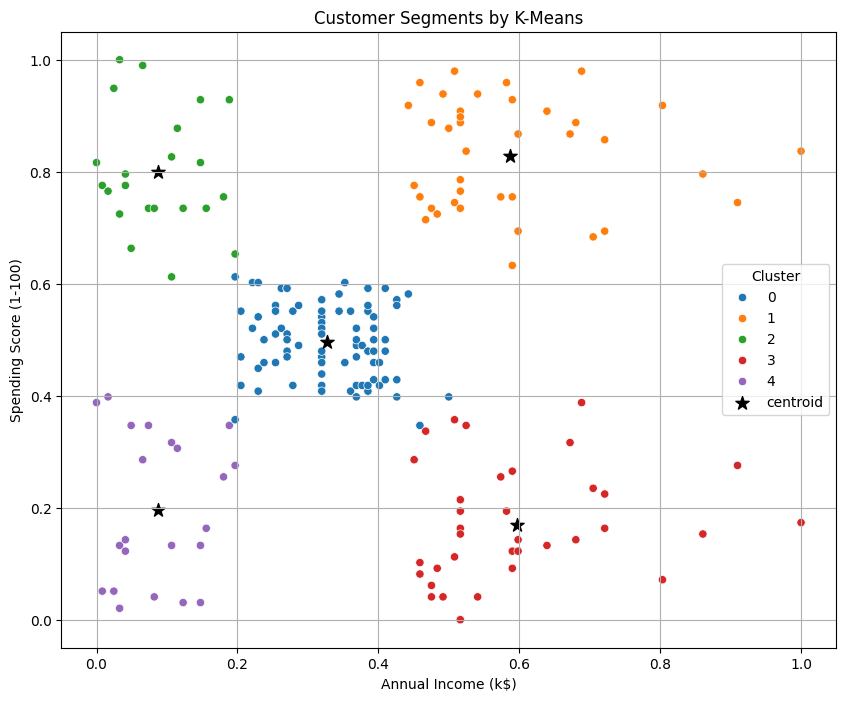

In [45]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_scaled, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='tab10')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1] , color='black' ,s = 100 , marker= '*', label='centroid')
plt.title("Customer Segments by K-Means")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [47]:
# Ensure the cluster labels are in df
df['Cluster'] = df_scaled['cluster']

# Now create the pie chart
import plotly.express as px

fig = px.pie(
    df,
    values="Annual Income (k$)",
    names="Cluster",
    title="Total Annual Income by Customer Cluster",
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.show()


 ## Bonus

 ## DBSCAN Clustering Summary


In this section, we applied the DBSCAN algorithm to segment mall customers based on Annual Income and Spending Score. Unlike K-Means, DBSCAN automatically detects the number of clusters based on data density and identifies outliers as noise (-1).

Before clustering, we standardized the features using StandardScaler to ensure equal contribution from both variables. We set:

eps = 0.5: Neighborhood radius

min_samples = 5: Minimum points to form a cluster

The resulting clusters were visualized, and average income and spending were analyzed for each group, helping us understand customer segments without needing to predefine cluster count.

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Use the same features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize data (better for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to the original dataframe
df['DBSCAN_Cluster'] = db_labels


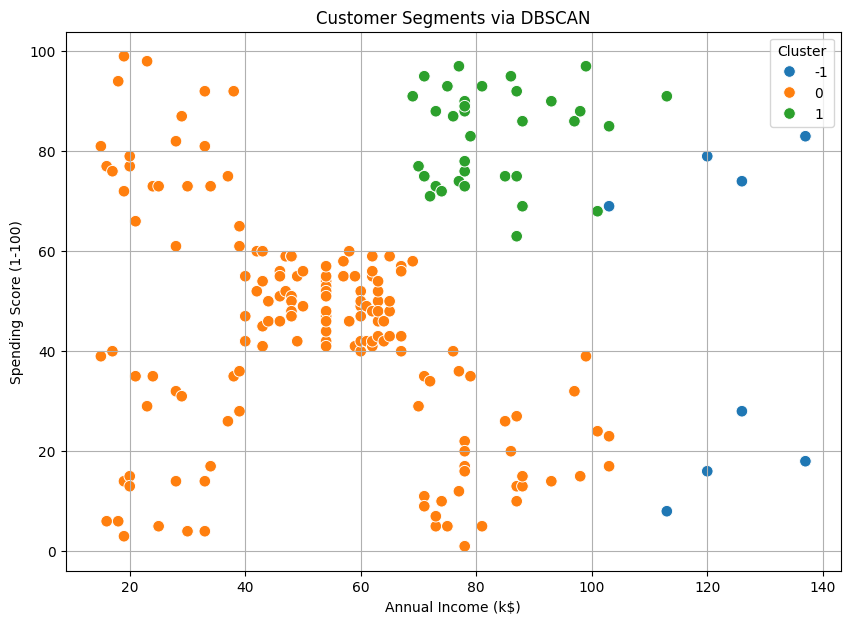

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X['Annual Income (k$)'],
    y=X['Spending Score (1-100)'],
    hue=df['DBSCAN_Cluster'],
    palette='tab10',
    s=70
)
plt.title("Customer Segments via DBSCAN")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [46]:
# Group by DBSCAN cluster and calculate average spending
df.groupby('DBSCAN_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)


,Annual Income (k$),Spending Score (1-100)
DBSCAN_Cluster,,
-1,122.75,46.88
0,52.49,43.10
1,82.54,82.80


from matplotlib import pyplot as plt
_df_52['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55['Annual Income (k$)'].plot(kind='line', figsize=(8, 4), title='Annual Income (k$)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_56['Spending Score (1-100)'].plot(kind='line', figsize=(8, 4), title='Spending Score (1-100)')
plt.gca().spines[['top', 'right']].set_visible(False)

## Compare DBSCAN vs K-Means Clusters Side-by-Side

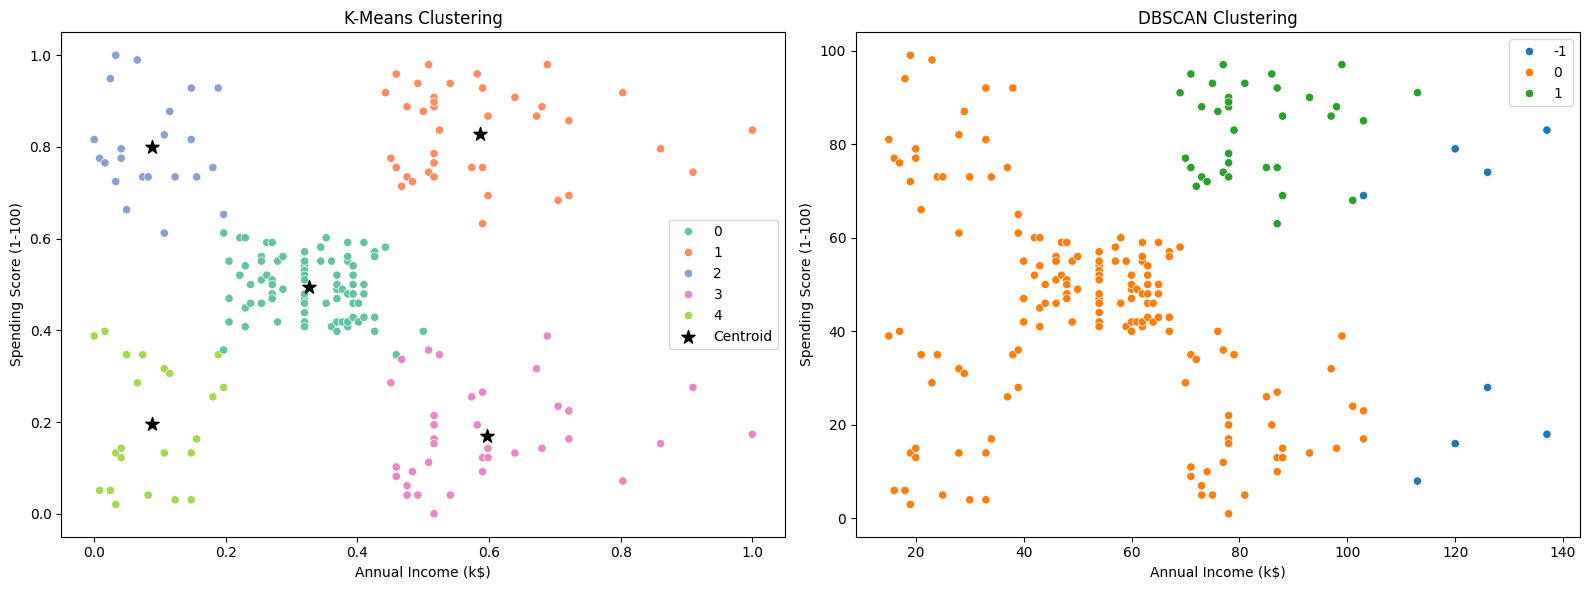

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# KMeans Plot
sns.scatterplot(
    data=df_scaled,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='cluster',
    palette='Set2',
    ax=axs[0]
)
axs[0].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', s=100, marker='*', label='Centroid')
axs[0].set_title("K-Means Clustering")
axs[0].legend()

# DBSCAN Plot
sns.scatterplot(
    x=X['Annual Income (k$)'],
    y=X['Spending Score (1-100)'],
    hue=df['DBSCAN_Cluster'],
    palette='tab10',
    ax=axs[1]
)
axs[1].set_title("DBSCAN Clustering")
axs[1].legend()

plt.tight_layout()
plt.show()
